# Exercise 1

Visualize the network (from lecture 5) and calculate basic stats (from lecture 4). For this exercise, we assume that you've already generated the network of superheroes, report work on the giant connected component.

In [1]:
import networkx as nx

In [2]:
CharacterNetwork=nx.read_gml('week4/characterNetwork.gml')

## Exercise 1a: Stats (see lecture 4 for more hints)

**What is the number of nodes in the network?**

In [3]:
print("Number of nodes in network: {}".format(len(CharacterNetwork.nodes())))

Number of nodes in network: 2594


**What is the number of links?**

In [4]:
print("Number of links in network: {}".format(len(CharacterNetwork.edges())))

Number of links in network: 44234


In [9]:
CharacterNetwork.nodes()['A-Bomb']['univers']

'Marvel'

**What is the number of links connecting Marvel and DC? Explain in your own words what those links mean?**

In [12]:
connecting_edges=0

for edge in CharacterNetwork.edges():
    if CharacterNetwork.nodes()[edge[0]]['univers']!=CharacterNetwork.nodes()[edge[1]]['univers']:
        connecting_edges+=1
        
print("Number of links connecting Marvel and DC: {}".format(connecting_edges))

Number of links connecting Marvel and DC: 921


**Who are top 5 most connected characters? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected.**

In [19]:
#sorting based on https://stackoverflow.com/questions/49427638/removing-self-loops-from-undirected-networkx-graph (4..10.2020)
print("Mosted connected character:")
print('---------------------------')
print()
print("For in-degrees:")
print('-----------------')
for node in sorted(CharacterNetwork.in_degree, key=lambda x: x[1], reverse=True)[0:5]:
    print("- {}: {}".format(node[0],node[1]))
print()    
print("For out-degrees:")
print('-----------------')
for node in sorted(CharacterNetwork.out_degree, key=lambda x: x[1], reverse=True)[0:5]:
    print("- {}: {}".format(node[0],node[1]))

Mosted connected character:
---------------------------

For in-degrees:
-----------------
- Superman: 597
- Catherine Cobert: 582
- Spider-Man: 482
- Barracuda (II): 470
- Brute(DC): 470

For out-degrees:
-----------------
- Hood: 137
- Smiling Tiger: 102
- Star Thief: 102
- Venom: 102
- Psylocke: 100


**Plot the in and out-degree distributions**
- **Explain what you observe?**
    
- **Explain why the in-degree distribution is different from the out-degree distribution?**

Initially a list of in degrees and out degrees are determined

In [20]:
degree_in=[d for n, d in CharacterNetwork.in_degree()]
degree_out=[d for n, d in CharacterNetwork.out_degree()]

The degrees are then binned

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
degree_count_in,bins_in=np.histogram(degree_in,bins=np.arange(1,np.max(degree_in)+2))
degree_count_out,bins_out=np.histogram(degree_out,bins=np.arange(1,np.max(degree_out)+2))

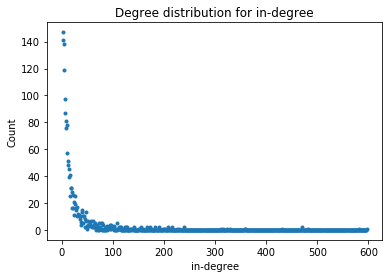

In [25]:
plt.plot(np.arange(1,np.max(degree_in)+1),degree_count_in,'o',markersize=3)
plt.xlabel("in-degree")
plt.ylabel("Count")
plt.title("Degree distribution for in-degree")
plt.show()

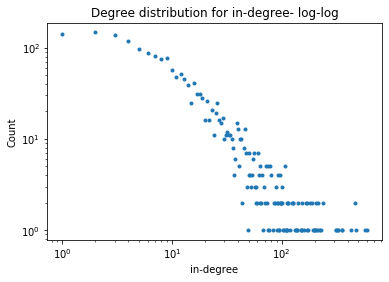

In [26]:
plt.plot(np.arange(1,np.max(degree_in)+1),degree_count_in,'o',markersize=3)
plt.xlabel("in-degree")
plt.ylabel("Count")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree distribution for in-degree- log-log")
plt.show()

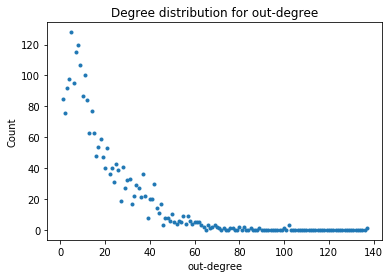

In [27]:
plt.plot(np.arange(1,np.max(degree_out)+1),degree_count_out,'o',markersize=3)
plt.xlabel("out-degree")
plt.ylabel("Count")
plt.title("Degree distribution for out-degree")
plt.show()

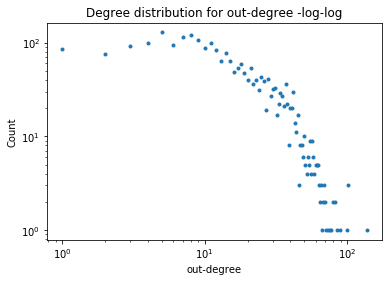

In [28]:
plt.plot(np.arange(1,np.max(degree_out)+1),degree_count_out,'o',markersize=3)
plt.xlabel("out-degree")
plt.ylabel("Count")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree distribution for out-degree -log-log")
plt.show()

The difference in in- and out-degrees can be understood in the light of there being a few central characters. These few characters will be refferenced frequently by other characters, leading to a few high in-degrees. At the same time there is only a few character which are connected to many other characters, which is reflected in the out-degree. ***Not That meaningful. Any sugestions?***

**Compare the degree distribution to a random network with the same number of nodes and probability of connection $p$. Comment or your results.**

To generate a random network  𝑝  must first be calculated.

In [29]:
N=len(CharacterNetwork.nodes())
k_avg=(np.sum(degree_in)+np.sum(degree_out))/N
k_avg

34.10485736314572

In [30]:
p=k_avg/(N-1)
p

0.013152663850036914

The network can now be generated.

In [31]:
random_directed_network=nx.erdos_renyi_graph(N, p, directed=True)

The degree distributions can now be plotted.

In [32]:
# get degrees
degree_in_random=[d for n, d in random_directed_network.in_degree()]
degree_out_random=[d for n, d in random_directed_network.out_degree()]

degree_count_in_random,bins_in_random=np.histogram(degree_in_random,bins=np.arange(1,np.max(degree_in_random)+2))
degree_count_out_random,bins_out_random=np.histogram(degree_out_random,bins=np.arange(1,np.max(degree_out_random)+2))

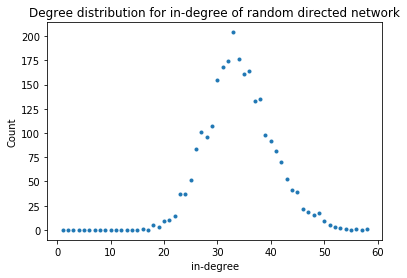

In [33]:
plt.plot(np.arange(1,np.max(degree_in_random)+1),degree_count_in_random,'o',markersize=3)
plt.xlabel("in-degree")
plt.ylabel("Count")
plt.title("Degree distribution for in-degree of random directed network")
plt.show()

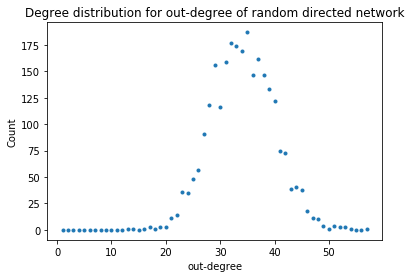

In [34]:
plt.plot(np.arange(1,np.max(degree_out_random)+1),degree_count_out_random,'o',markersize=3)
plt.xlabel("out-degree")
plt.ylabel("Count")
plt.title("Degree distribution for out-degree of random directed network")
plt.show()

A noticable difference between the degree distribution for the random network and the character network is that the they for the random network appear to follow a distinct binomial distibution, while they for the character network appear to be better decibet by a power law. Furthermore it can be noticed that both the distributions of the in- and out-degree for the random network are very similar, while they differ for the character network. Furthermore it can be noticed that range of the dgree distributions for the character network are much larger than for the random network.

## Exercise 1b: Visualization (see lecture 5 for more hints)

**Create a nice visualization of the total network**
- **Color nodes according to universe**
- **Scale node-size according to degree**
- **Whatever else you feel like.**
- **If you can get it to work, get node positions based on the Force Atlas 2 algorithm**

Before the visualization is made, the largest connected component is extracted.

In [40]:
Charaters_largest_cc = max(nx.weakly_connected_components(CharacterNetwork), key=len)
print('Size of the largest connected component: ',len(Charaters_largest_cc))
Charaters_largest_cc=CharacterNetwork.subgraph(Charaters_largest_cc).copy()

Size of the largest connected component:  2592


An undirected version of the network is now created.

In [42]:
undirected_CharaterNetwork=Charaters_largest_cc.to_undirected()

Now the visualzation can be made.

In [43]:
from fa2 import ForceAtlas2

A colormap is created for the univers attribute.

In [45]:
color_map={'Marvel':"#ff0000",'DC':"#000000"} #Marvel red,DC black

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.76it/s]


BarnesHut Approximation  took  1.78  seconds
Repulsion forces  took  12.48  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  0.18  seconds


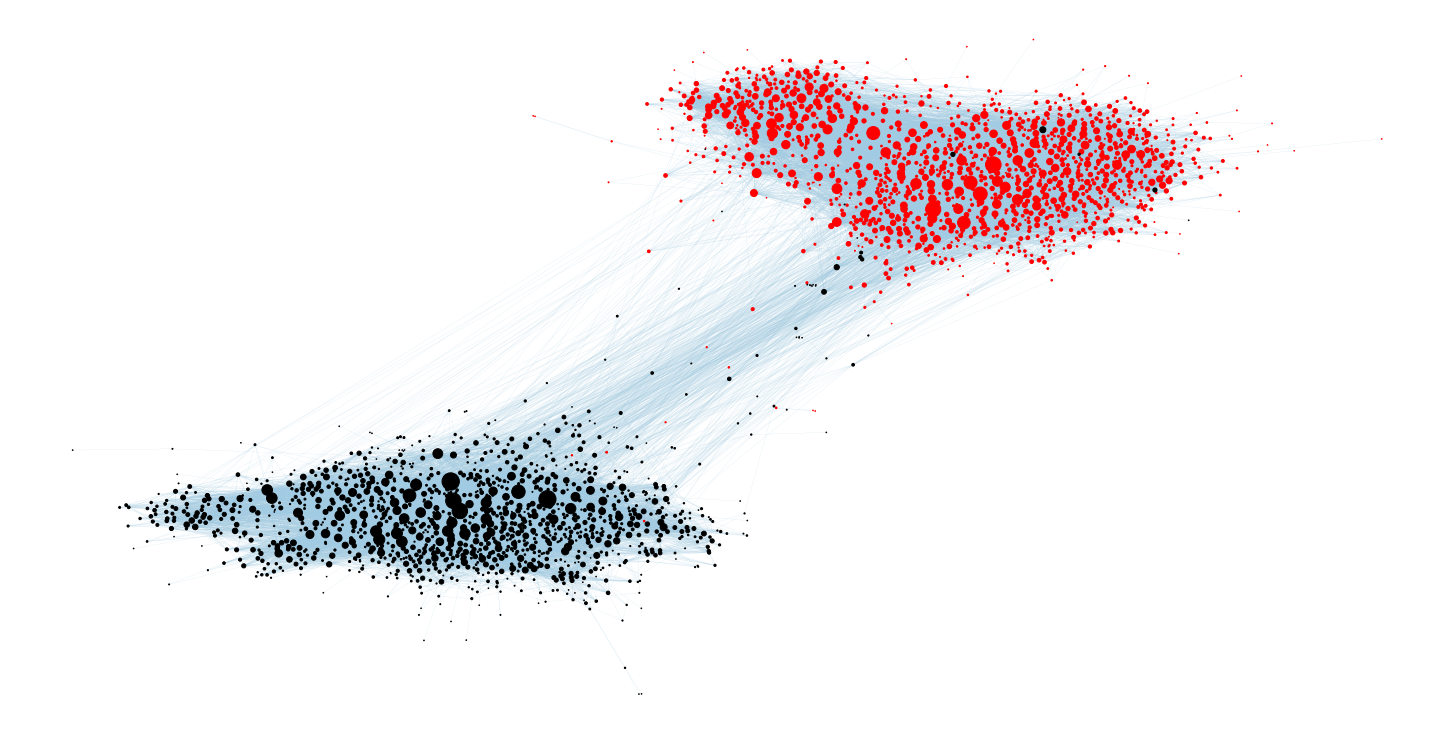

In [47]:
forceatlas2 = ForceAtlas2(strongGravityMode=False)
positions = forceatlas2.forceatlas2_networkx_layout(undirected_CharaterNetwork)
plt.figure(figsize=(20,10))
nx.draw(undirected_CharaterNetwork,positions,node_color=[color_map[t] for t in [undirected_CharaterNetwork.nodes()[node]['univers'] for node in undirected_CharaterNetwork]],node_size=[i[1]/2 for i in undirected_CharaterNetwork.degree()],width=0.1,edge_color='#A0CBE2')
plt.show()

# Exercise 2

Create your own version of the TF-TR word-clouds. Explain your process and comment on your results.

As an intitial step the pages of the charaters within each univers is dowloaded and combined into two strings. To be able to access the text, the wikilinks are obtained.

In [1]:
import pandas as pd
from urllib.parse import quote

In [2]:
marvel_charaters=pd.read_csv('https://github.com/SocialComplexityLab/socialgraphs2020/raw/master/files/marvel_characters.csv',delimiter='|')
dc_charaters=pd.read_csv('https://github.com/SocialComplexityLab/socialgraphs2020/raw/master/files/dc_characters.csv',delimiter='|',lineterminator=';')

In [3]:
dc_charaters=dc_charaters[['CharacterName','WikiLink']]
#removing characters with unknown pages
dc_charaters=dc_charaters.dropna(subset=['WikiLink'])
#quoting the links so they match the filenmames the pages where saved in
dc_charaters['WikiLink']=dc_charaters.WikiLink.apply(lambda l: quote(l))
dc_charaters['univers']='DC'

marvel_charaters=marvel_charaters[['CharacterName','WikiLink']]
#removing characters with unknown pages
marvel_charaters=marvel_charaters.dropna(subset=['WikiLink'])
#quoting the links so they match the filenmames the pages where saved in
marvel_charaters['WikiLink']=marvel_charaters.WikiLink.apply(lambda l: quote(l))
marvel_charaters['univers']='Marvel'

Now the pages for the same univers are collected into one string, with all strings transformed to lower case.

In [4]:
DC_pages=''
for link in dc_charaters.WikiLink:
    try:
        DC_pages+=open('week4/'+link, encoding='utf8').read().lower()
    except:
        continue

In [5]:
Marvel_pages=''
for link in marvel_charaters.WikiLink:
    try:
        Marvel_pages+=open('week4/'+link, encoding='utf8').read().lower()
    except:
        continue

We can now tokenize the texts while also removing all punctation, by searcing only for word. This approach means that stop-word as well as word from the mark-up is still included.

In [7]:
import nltk

In [8]:
Marvel_tokens=nltk.regexp_tokenize(Marvel_pages,'[A-Za-z]+') #get tokens, without punctation.

DC_tokens=nltk.regexp_tokenize(DC_pages,'[A-Za-z]+') #get tokens, without punctation.

At last the text is Lemmatized.

In [9]:
porter=nltk.PorterStemmer()

In [10]:
DC_tokens=[porter.stem(token) for token in DC_tokens]

Marvel_tokens=[porter.stem(token) for token in Marvel_tokens]

Now that the text has been transformed to a format we ca work with, the pages variables are cleared to free up memory.

In [11]:
DC_pages=''
Marvel_pages=''

Now we are ready to create the TF list, containg the frequecy of the terms in the two universes.

In [12]:
DC_TF=pd.DataFrame(DC_tokens)[0].value_counts()
Marvel_TF=pd.DataFrame(Marvel_tokens)[0].value_counts()

The count in itself can be missleading as we are interested in terms unique to the universes. Here common words might be frequent in both universes, both of no particualr interest for us. Therefor the term frequencies are weighted, based on there uniquness to the univers. To do this we start by defining the weight functions.

In [13]:
def get_weight_Marvel(token,c):
    m_if=Marvel_TF.loc[token]
    try:
        dc_if=DC_TF.loc[token]
    except:
        dc_if=0
    return m_if/(dc_if+c)

In [14]:
def get_weight_DC(token,c):
    dc_if=DC_TF.loc[token]
    try:
        m_if=Marvel_TF.loc[token,0]
    except:
        m_if=0
    return dc_if/(m_if+c)

Ther weights are now calculated.

In [15]:
Marvel_TF=Marvel_TF.to_frame()
DC_TF=DC_TF.to_frame()

In [16]:
Marvel_TF['weight']=Marvel_TF.apply(lambda l:get_weight_Marvel(l.name,10),axis=1)
Marvel_TF.head()

,0,weight
the,221300,0.857111
and,94752,0.895593
of,93192,0.778429
ref,90359,1.365765
to,88790,0.900909


In [17]:
DC_TF['weight']=DC_TF.apply(lambda l:get_weight_DC(l.name,10),axis=1)
DC_TF.head()

,0,weight
the,258183,1.166612
of,119708,1.284393
and,105788,1.116355
to,98546,1.109752
in,89430,1.304900


Having calculated the weights we are now ready to create the TF-TR lists.

In [18]:
Marvel_TF_TR=pd.DataFrame(Marvel_TF[0]*Marvel_TF.weight)
Marvel_TF_TR=Marvel_TF_TR.sort_values(0,ascending=False)

In [19]:
DC_TF_TR=pd.DataFrame(DC_TF[0]*DC_TF.weight)
DC_TF_TR=DC_TF_TR.sort_values(0,ascending=False)

Below we can see the 10 most frequent terms within the two universes in terms of weighted frequency. Even with only very limited knowledge of Marvel and DC the top-10 contains very recognisable terms representing prominent superheros. This indicate that the weights have had the desired effect.  

In [24]:
print('DC Top-10:')
DC_TF_TR[:10]

DC Top-10:


,0
batman,5.104024e+06
superman,2.846716e+06
bizarro,2.045095e+06
dc,1.981584e+06
superboy,1.088416e+06
supergirl,8.725711e+05
sinestro,8.696601e+05
gotham,6.904328e+05
leagu,6.384739e+05
brainiac,5.133722e+05


In [25]:
print('Marvel Top-10:')
Marvel_TF_TR[:10]

Marvel Top-10:


,0
marvel,920007.221468
x,586585.985507
aveng,561442.393407
hulk,483697.301075
wolverin,461415.705882
mutant,419514.710784
thor,373928.204819
morlock,370562.500000
spider,357879.493151
deadpool,249896.894737


To create the wordclouds TF-TR dataframes are transformed into dictionaries.

In [26]:
DC_TF_TR=DC_TF_TR.to_dict()[0]
Marvel_TF_TR=Marvel_TF_TR.to_dict()[0]

We are now ready to create the wordclouds.

In [27]:
from wordcloud import WordCloud

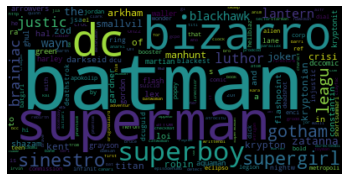

In [30]:
wordcloud_DC=WordCloud()
wordcloud_DC.generate_from_frequencies(DC_TF_TR)
plt.imshow(wordcloud_DC, interpolation='bilinear')
plt.axis("off")
plt.show()

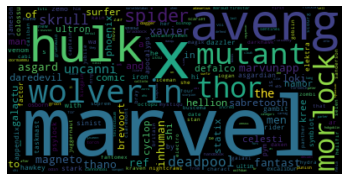

In [32]:
wordcloud_Marvel=WordCloud()
wordcloud_Marvel.generate_from_frequencies(Marvel_TF_TR)
plt.imshow(wordcloud_Marvel, interpolation='bilinear')
plt.axis("off")
plt.show()

The two wordclouds differ clearly for the two universes, and appear to be capturing each univers well with very recognisable terms being prominently displayed.

# Excercise 3

In [1]:
import community 
import matplotlib.pyplot as plt

In [ ]:
#Select all DC related nodes from the network and make subgraph#
dc_nodes=[]

for node in CharacterNetwork.nodes():
    if  CharacterNetwork.nodes[node]['univers']=='DC':
        dc_nodes.append(node)

dc_subgraph=CharacterNetwork.subgraph(dc_nodes)       

In [ ]:
#Select all Marvel related nodes from the network and make subgraph#
marvel_nodes=[]

for node in CharacterNetwork.nodes():
    if  CharacterNetwork.nodes[node]['univers']=='MArvel':
        marvel_nodes.append(node)
        
marvel_subgraph=CharacterNetwork.subgraph(marvel_nodes)

In [ ]:
#Calculate the modularity 
L=len(CharacterNetwork.edges())
L_marvel=len(marvel_subgraph.edges())
L_dc=len(dc_subgraph.edges())
K_marvel=sum([x for _,x in marvel_subgraph.degree()])
K_dc=sum([x for _,x in dc_subgraph.degree()])
((L_marvel/L)-(K_marvel/(2*L)**2)+(L_dc/L)-(K_dc/(2*L)**2))

Generally, the modularity should range in [-1,1]. Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.[1] https://en.wikipedia.org/wiki/Modularity_(networks). In this case, the round 0.4 modularity is a fair number to verify there is a community structure here.

__Question1:Explain briefly how you chose to identify the communities: Which algorithm did you use, how does it work?__

We use the Python Louvain-algorithm implementation to find communities for the network.The quality of the communities referred as partitions hereafter is measured by Modularity of the partition[2]http://networksciencebook.com/chapter/9.The modularity score ranges between -1 and 1 and higher the modularity score means the communities detected are good and more tightly knit.Within the algorithm,the idea is to reach a local maximum of modularity after which no further increase in modularity can be possible by iterating nodes and then rebuild a new network by grouping the nodes together labelled in the same community[3].https://medium.com/walmartglobaltech/demystifying-louvains-algorithm-and-its-implementation-in-gpu-9a07cdd3b010

In the belowing tasks, we only go with DC univers.

In [ ]:
#In order to use community funtion, the graph should be un-directed#
dc_subgraph=dc_subgraph.to_undirected()

In [ ]:
partition=community.best_partition(dc_subgraph)
modularity = community.modularity(partition,dc_subgraph)

In [ ]:
modularity

Within DC univers, the modularity given by functions shows there is a community structure

In [ ]:
#Visulize the community in DC#
size = float(len(set(partition.values())))
pos = nx.spring_layout(dc_subgraph)
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(dc_subgraph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(dc_subgraph,pos, alpha=0.5)
plt.show()

In [ ]:
print("We can see from above, there are {} communities in total we found:".format(size))

__Question 3: Plot the distribution of community sizes.__

In [ ]:
communitylist=partition.values()
distribution ={k:list(communitylist).count(k) for k in communitylist}
plt.bar(list(distribution.keys()), distribution.values(), color='g')
plt.title("The distribution of community sizes.")
plt.show()

__Question 4: For the 5-10 largest communities, create TF-IDF based rankings of words in each community.There are many ways to calculate TF-IDF, explain how you've done it and motivate your choices.__

We try with the first five large communities which are community 0,1,3,4 and 5.

TF: Term Frequency.It measures how frequently a term occurs in a document as every document is different in length.There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.[4]https://monkeylearn.com/blog/what-is-tf-idf/. We use raw counts here.


IDF: Inverse Document Frequency. It measures how important a term is. In TF, all terms are considered equally important. Thus we need to weigh down the frequent terms while scaling up the rare ones by calculating TF-IDF.There are also manys ways to do it, here we choose the simplest IDF ( log(n/N_doc)).

__Question 5: Create a word-cloud displaying the most important words in each community.__

In [ ]:
#Get all charater names in each community#

Community_0=[]
Community_1=[]
Community_3=[]
Community_4=[]
Community_5=[]
for k,v in partition.items():
    if v == 0:
        Community_0.append(k)
    if v == 1:
        Community_1.append(k)
    if v == 3:
        Community_3.append(k)
    if v == 4:
        Community_4.append(k)
    if v == 5:
        Community_5.append(k)

In [ ]:
#Create 5 Str that contain all character's web contents in each community. The procedures are like what we did in excercise 2#

def creat_str(community_str,name_list):
    
    for character in  name_list:     
        try:
            f=open('week4/dc/'+character+'.txt', encoding='utf8').read().lower()
            community_str=community_str+f
        except:
            continue
    return community_str


str_community0=''
str_community1=''
str_community3=''
str_community4=''
str_community5=''

str_community0=creat_str(str_community0,Community_0)
str_community1=creat_str(str_community1,Community_1)
str_community3=creat_str(str_community3,Community_3)
str_community4=creat_str(str_community4,Community_4)
str_community5=creat_str(str_community5,Community_5)

In [ ]:
#Set up TF for each community#

def set_up_tfs(community_str):
    import nltk
    porter=nltk.PorterStemmer()
    #get tokens, without punctation.
    DC_tokens_tmp=nltk.regexp_tokenize(community_str,'[A-Za-z]+')
    #Lemmatized
    DC_tokens_tmp=[porter.stem(token) for token in DC_tokens_tmp]  
    # create the TF list
    return pd.DataFrame(DC_tokens_tmp)[0].value_counts() 

DC_TF_0=set_up_tfs(str_community0)
DC_TF_1=set_up_tfs(str_community1)
DC_TF_3=set_up_tfs(str_community3)
DC_TF_4=set_up_tfs(str_community4)
DC_TF_5=set_up_tfs(str_community5)

In [ ]:
#create a dict that contains all words shown in 5 community str documents.
#The keys are words, the values now are all 0

map0=dict(DC_TF_0)
map1=dict(DC_TF_1)
map3=dict(DC_TF_3)
map4=dict(DC_TF_4)
map5=dict(DC_TF_5)

final_map = map0.copy()
final_map.update(map1)
final_map.update(map3)
final_map.update(map4)
final_map.update(map5)
final_result = dict.fromkeys(final_map.keys(), 0)

In [ ]:
#Set a function that find the number of documents that contain the word
#Since we choose 5 communities, all results range in[0:5]. 
#Using the results to updated the value of the dict we create in the last step.

def updateValue(final_result, one_map):
    for ele in final_result:
        if ele in one_map:
            final_result[ele]=final_result[ele]+1
    return final_result

def update_value_from_map_list(final_result,map_list):
    for map_ele in map_list:
        final_result = updateValue(final_result,map_ele)
    return final_result  

final_result = update_value_from_map_list(final_result,[map0,map1,map3,map4,map5])

In [ ]:
#Calculate IDF for each word
#The more closer to 0, the more common the word is which means it's not a typical word for the community.
def function_idf(final_result):
    final_result_idf=final_result
    import math
    N=5
    for key,val in final_result_idf.items():
         final_result_idf[key]= math.log(N / val)
    return final_result_idf

final_result_idf=function_idf(final_result

In [ ]:
#Add IDF to each word to original 5 DC_TF lists
def add_idf(raw_count_file,idf_wordlist):
    mask = raw_count_file.index.isin(idf_wordlist.keys())
    raw_count_file.loc[mask, 'IDF'] = raw_count_file.index.map(idf_wordlist) 
    return  raw_count_file

In [ ]:
DC_TF_0=DC_TF_0.to_frame()
DC_TF_1=DC_TF_1.to_frame()
DC_TF_3=DC_TF_3.to_frame()
DC_TF_4=DC_TF_4.to_frame()
DC_TF_5=DC_TF_5.to_frame()

TF_IDF_0=add_idf(DC_TF_0,final_result_idf)
TF_IDF_1=add_idf(DC_TF_1,final_result_idf)
TF_IDF_3=add_idf(DC_TF_3,final_result_idf)
TF_IDF_4=add_idf(DC_TF_4,final_result_idf)
TF_IDF_5=add_idf(DC_TF_5,final_result_idf)

In [ ]:
#Just to make columns' name make more sense#
TF_IDF_0.rename(columns = {0:'TF'}, inplace = True) 
TF_IDF_1.rename(columns = {0:'TF'}, inplace = True) 
TF_IDF_3.rename(columns = {0:'TF'}, inplace = True) 
TF_IDF_4.rename(columns = {0:'TF'}, inplace = True) 
TF_IDF_5.rename(columns = {0:'TF'}, inplace = True) 

In [ ]:
#Create TF-IDF list for each community. The TF-IDF is simply the TF multiplied by IDF named Updated weight below.
#Select the new column to prepare for wordclouds
def mutiply_TF_IDF(TF_IDF_file):
    TF_IDF_file['Updated weight']=TF_IDF_file['TF']*TF_IDF_file['IDF']
    TF_IDF_file=TF_IDF_file.sort_values(by='Updated weight',ascending=False)
    wordcloud_list=TF_IDF_file.to_dict()['Updated weight']
    return wordcloud_list

wordcloud_0=mutiply_TF_IDF(TF_IDF_0)
wordcloud_1=mutiply_TF_IDF(TF_IDF_1)
wordcloud_3=mutiply_TF_IDF(TF_IDF_3)
wordcloud_4=mutiply_TF_IDF(TF_IDF_4)
wordcloud_5=mutiply_TF_IDF(TF_IDF_5)

In [ ]:
#Wordcloud funtion
def make_wordcloud(word_file_list):
    from wordcloud import WordCloud
    for file in  word_file_list:
        wordcloud=WordCloud()
        wordcloud.generate_from_frequencies(file)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.figure(figsize=[7,7])
        plt.show()
    

In [ ]:
word_file_list=[wordcloud_0,wordcloud_1,wordcloud_3,wordcloud_4,wordcloud_5]
make_wordcloud(word_file_list)

# Exercise 4
Analyze the sentiment of the communities (lecture 8). Here, we assume that you've successfully identified communities. Unlike above - we work all communities. It's still OK to work with data from a single universe. More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below;
- We name each community by its three most connected characters.
- Average the average sentiment of the nodes in each community to find a community level sentiment.

Here's what you need to do:

- Calculate and store sentiment for every single page.

The following work with sentiments are based on the LabMT wordlist (labMT 1.0), which is downloaded below.\
**ref:** Dodds, P. S., Harris, K. D., Kloumann, I. M., Bliss, C. A., Danforth, C. M.(2011) "Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter". https://doi.org/10.1371/journal.pone.0026752 (visited 31.10.2020).

In [2]:
url='https://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001'

labMT_wordlist=pd.read_csv(url,'\t',skiprows=3).set_index('word')
labMT_wordlist.head()

,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
word,,,,,,,
laughter,1,8.50,0.9313,3600,--,--,1728
happiness,2,8.44,0.9723,1853,2458,--,1230
love,3,8.42,1.1082,25,317,328,23
happy,4,8.30,0.9949,65,1372,1313,375
laughed,5,8.26,1.1572,3334,3542,--,2332


Next a function is created to calculate to calculate the sentiment given a list of tokens.

In [3]:
def get_sentiment(token_list):
    sentiment=0
    tf=pd.Series(token_list).value_counts()
    tf_total=tf.sum()
    tokens=set(token_list) # set of words in documens
    words=set(wordlist.index) # set of words in LabMT word list
    for t in tokens:
        if t in words:
            sentiment+=(wordlist.happiness_average[t]*tf[t])/tf_total
    return sentiment

The sentiment of each pages is now calculated and stored as an attribute for each of the associated nodes in the Marvel-network.

In [ ]:
for node in Marvel_network.nodes():
    try:
        page_tokens=open('week4/'+marvel_charaters.loc[node,'WikiLink'], encoding='utf8').read().lower()
        page_tokens=nltk.regexp_tokenize( page_tokens,'[A-Za-z]+')
        Marvel_network.nodes()[node]['sentiment']=get_sentiment(page_tokens)
    except: #non valid links that meant that no page was downloaded.
        Marvel_network.nodes()[node]['sentiment']=np.NaN

- Create a histogram of all character's associated page-sentiments.

Based on the sentiment attribute of the network, a list of all sentiments for pages in Marvel is created.

In [ ]:
sentimens=np.array([Marvel_network.nodes()[n]['sentiment'] for n in Marvel_network.nodes()])
sentimens=sentimens[np.isfinite(sentimens)] # remove all NaN sentiments

To find meaningful bins, we look at the minimum and maximum sentiments.

In [ ]:
print('min. sentiment: ',np.min(sentimens))
print('max. sentiment: ',np.max(sentimens))

It is observed that the sentimets are within a very small range.

In [ ]:
count_int,bin_edges=np.histogram(sentimens,[2.5,3,3.5,4,4.5,5])
plt.bar(bin_edges[:-1],count_int)
plt.title("Distribution sentiment of Marvel charater's pages")
plt.ylabel('Count')
plt.xlabel('Page sentiment')
plt.show()

With sentiments score rangeing from a scale of 1-9 where 1 is very negative and 9 is very happy, and around 5 is consideret neurtal, it can be observed that most pages have mild negative sentiments.

- What are the 10 characters with happiest and saddest pages?

The sentiments of the pages are added to the Marvel dataframe

In [ ]:
marvel_charaters['sentiment']=marvel_charaters.apply(lambda l: Marvel_network.nodes()[l.name]['sentiment'] if l.name in Marvel_network.nodes() else np.NaN,axis=1)

print('Top-10 most happy charater pages')
marvel_charaters.sentiment.sort_values(ascending=False)[:10]

print('Top-10 most sad charater pages')
marvel_charaters.sentiment.dropna().sort_values(ascending=False)[-10:]

- What are the three happiest communities?

Before any work with communities are continued the community information is added to the Marvel data frame.

In [ ]:
marvel_charaters['community']=marvel_charaters.apply(lambda l: Marvel_partition[l.name] if l.name in Marvel_partition else np.NaN,axis=1)

We now create a network for each community.

In [ ]:
communites=[]
for c in range(NC):
    communites.append(Marvel_network.subgraph(marvel_charaters[marvel_charaters.community==c].index).copy())
    sorted(communites[0].degree, key=lambda x: x[1], reverse=True)[:3]
    rename

 A dictonary is now made to map from the old community names to the new names.

In [ ]:
new_names={}
for c in range(NC):
    new_name=''
    for n in sorted(communites[c].degree, key=lambda x: x[1], reverse=True)[:3]:
        new_name+=n[0]+'-'
    new_names[c]=new_name[:-1]

Below we can see the new names for each of the communities.

In [4]:
new_names

NameError: name 'new_names' is not defined

The community names are now updated in the data frame of marvel.

In [ ]:
marvel_charaters['community']=marvel_charaters.community.apply(lambda l:new_names[l] if l in new_names else l)
marvel_charaters.head()

We are now ready to determine the three happiest communities.

In [ ]:
print('top-3 happiest communities:')
marvel_charaters.groupby('community').mean().sort_values('sentiment',ascending=False)[:3]

- what are the three saddest communities?

In [ ]:
print('top-3 saddest communities:')
marvel_charaters.groupby('community').mean().sort_values('sentiment',ascending=False)[-3:]

- Do these results confirm what you can learn about each community by skimming the wikipedia pages?

This does not appear to make much sense that Tarzan would be the most sad community withi